# Real-Time-like ECG Processing (Simulated)

Simulating real-time ECG filtering...


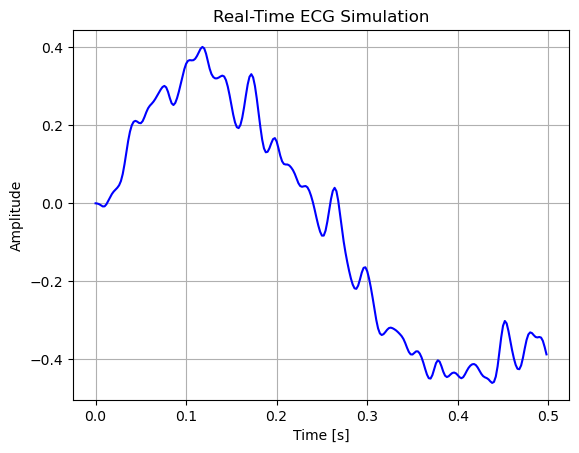

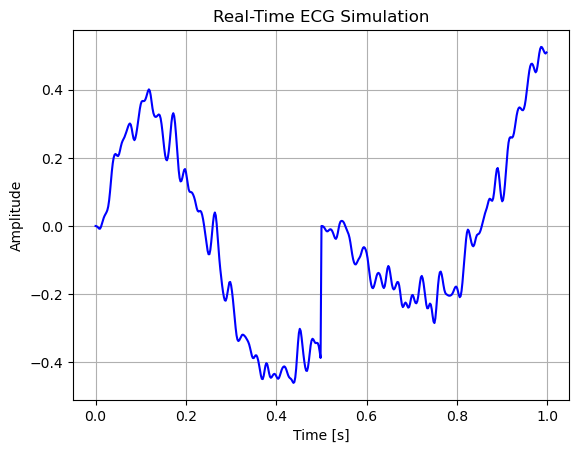

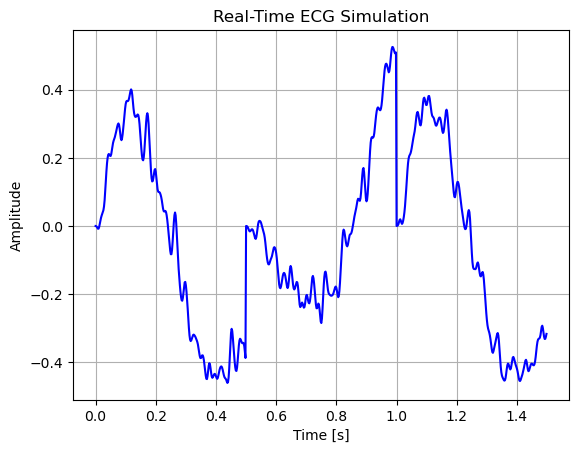

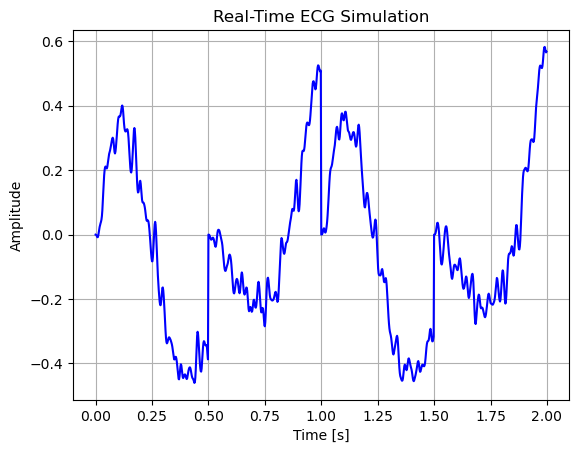

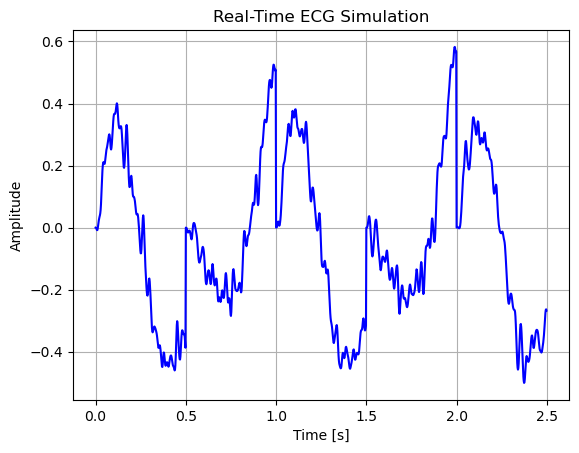

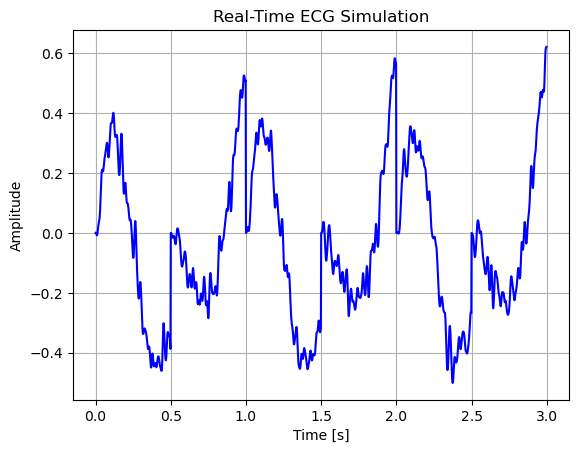

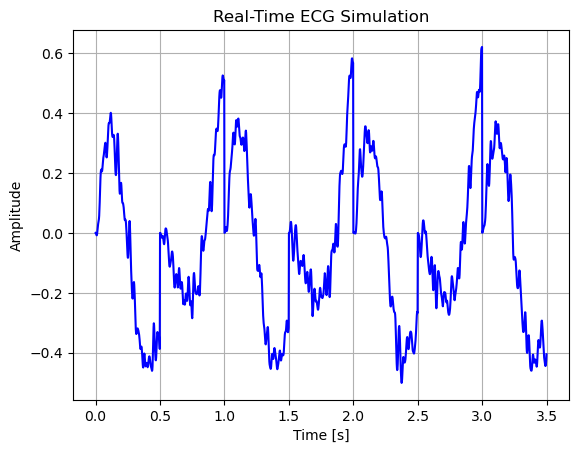

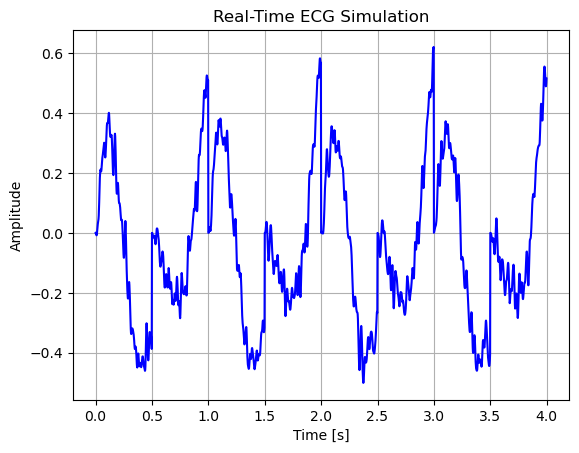

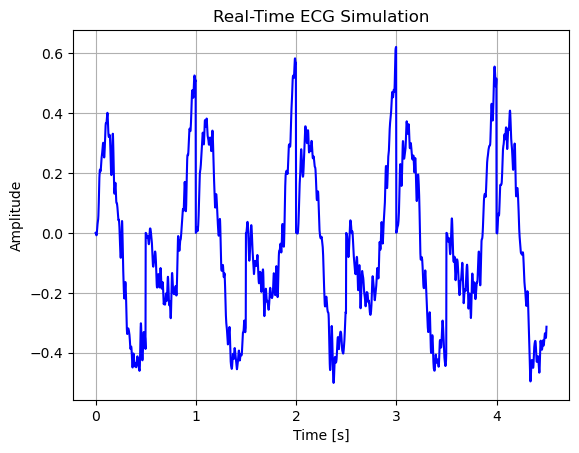

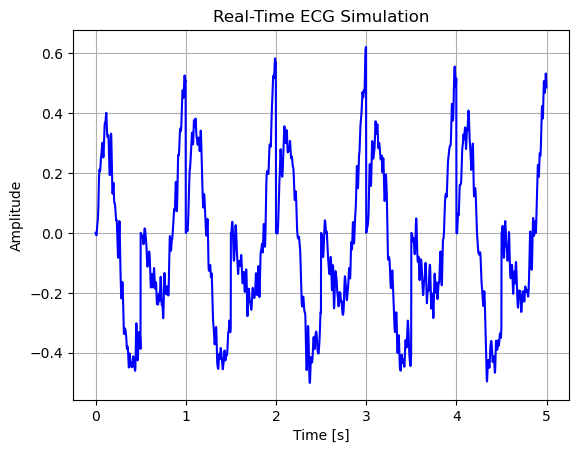

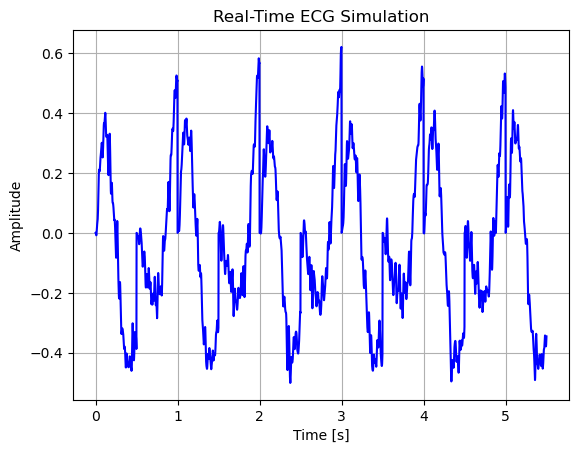

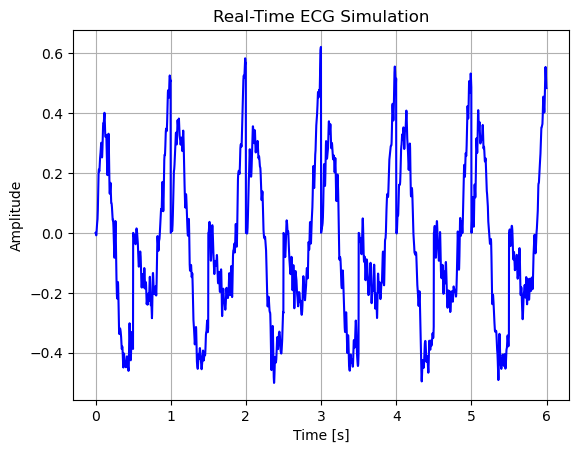

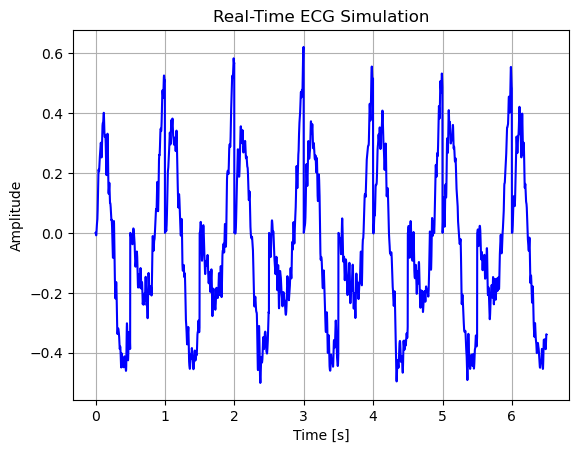

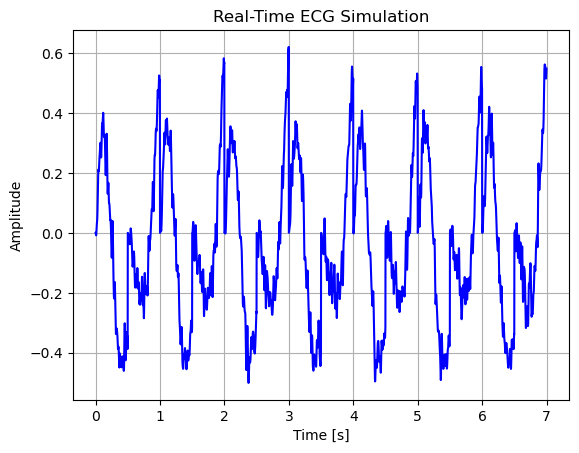

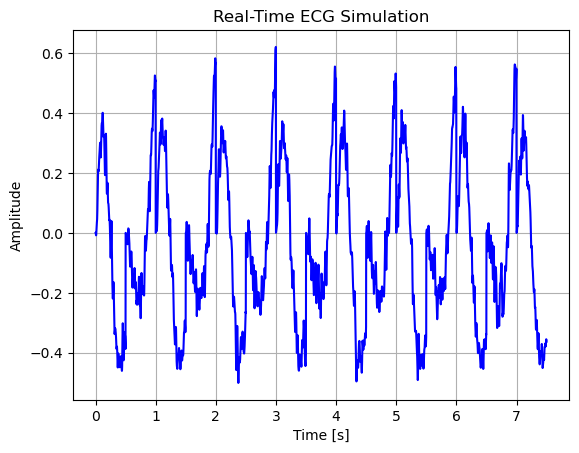

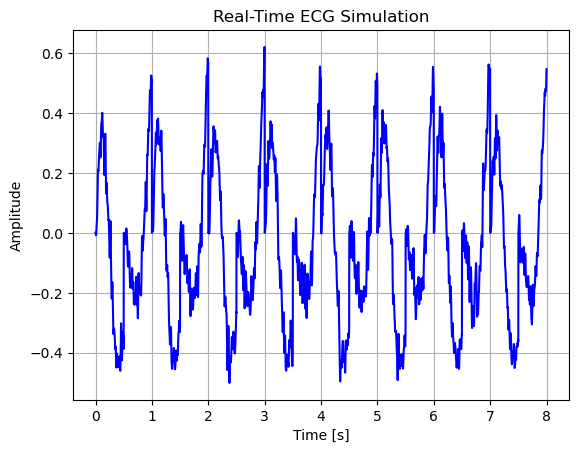

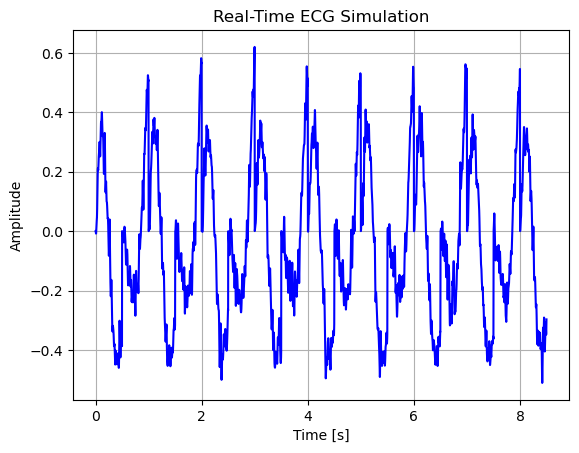

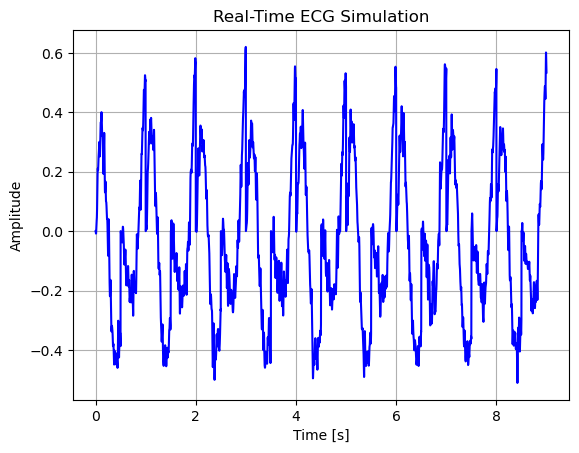

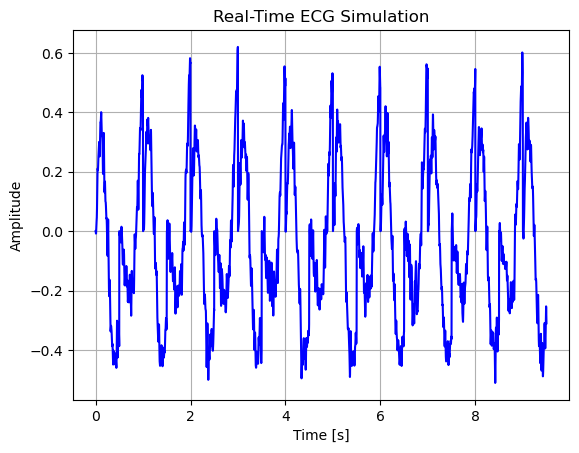

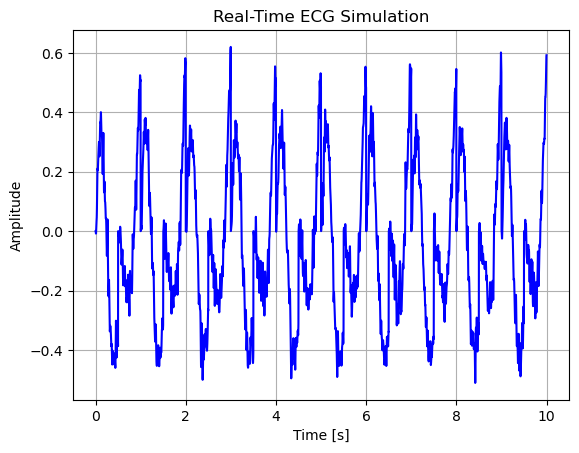

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.signal import butter, lfilter

# --- 1. Generate synthetic ECG-like signal ---
def synthetic_ecg(fs, duration, heart_rate=60):
    t = np.linspace(0, duration, int(fs * duration))
    # Basic ECG-like waveform (sum of sinusoids)
    ecg = 0.6 * np.sin(2 * np.pi * heart_rate/60 * t) \
        + 0.2 * np.sin(2 * np.pi * 2 * heart_rate/60 * t) \
        + 0.1 * np.random.randn(len(t))  # Add noise
    return t, ecg

# --- 2. Bandpass filter (0.5–40 Hz) ---
def bandpass_filter(signal, fs, lowcut=0.5, highcut=40.0, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, signal)

# --- 3. Simulate real-time processing ---
def simulate_real_time_processing(ecg_signal, fs, block_size=200):
    total_samples = len(ecg_signal)
    num_blocks = total_samples // block_size
    delay = block_size / fs

    processed_signal = []
    t_axis = []

    print("Simulating real-time ECG filtering...")

    for i in range(num_blocks):
        block = ecg_signal[i*block_size:(i+1)*block_size]
        filtered = bandpass_filter(block, fs)
        processed_signal.extend(filtered)
        t_axis.extend(np.arange(i*block_size, (i+1)*block_size)/fs)

        # Optional: plot dynamic update (comment out for performance)
        plt.clf()
        plt.plot(t_axis, processed_signal, label="Filtered ECG", color='blue')
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.title("Real-Time ECG Simulation")
        plt.grid(True)
        plt.pause(0.01)  # Live update

        time.sleep(delay)  # Simulate real-time delay

    plt.show()

# --- Run simulation ---
fs = 500           # Sampling frequency (Hz)
duration = 10      # Signal duration (s)
t, ecg = synthetic_ecg(fs, duration)

simulate_real_time_processing(ecg, fs, block_size=250)

# Kalman-Bucy Scalar Example in Python

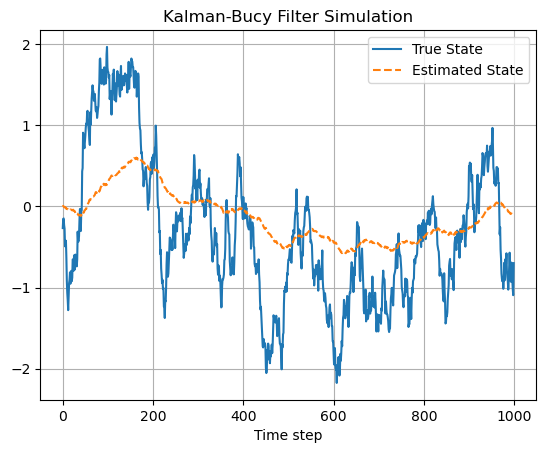

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
T = 10
N = int(T / dt)

A = -1
C = 1
Q = 2
R = 1

P = 1.0
x_true = 0.0
x_hat = 0.0

x_history = []
xhat_history = []
P_history = []

for k in range(N):
    # True system
    w = np.random.normal(0, np.sqrt(Q * dt))
    x_true += dt * (A * x_true) + w
    v = np.random.normal(0, np.sqrt(R))
    y = C * x_true + v

    # Kalman-Bucy update
    K = P * C / R
    x_hat += dt * (A * x_hat + K * (y - C * x_hat))
    P += dt * (2*A*P + Q - K * C * P)

    # Store
    x_history.append(x_true)
    xhat_history.append(x_hat)
    P_history.append(P)

# Plot results
plt.plot(x_history, label="True State")
plt.plot(xhat_history, label="Estimated State", linestyle="--")
plt.legend()
plt.title("Kalman-Bucy Filter Simulation")
plt.xlabel("Time step")
plt.grid()
plt.show()